In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import sqrt,log,exp
import os

In [2]:
a=np.zeros((512,512,3))
b=np.array(pd.read_csv("file2.txt", sep=" ", header=None))

In [3]:
for i in b:
    a[i[1],i[0]]=i[2:5]
    
h = b[:,:2].tolist() # x, y coordinate of the specified points

In [4]:
def not_four_points(i,j):
    return not ([i,j] in h)
def dis(i,j):
    return sqrt((i[0]-j[0])**2+(i[1]-j[1])**2)

In [5]:
print(not_four_points(0,0))

False


In [6]:
r=np.zeros((512,512,4))
t=0
s=np.array([a[0,0], a[0,255], a[255,0], a[255,255]])
s=b[:,2:5]
s=np.transpose(s)

In [7]:
for i in range(512):
    for j in range(512):
        if not_four_points(i,j):
            r[i,j] = [dis([i,j], h_i) for h_i in h]

In [8]:
def get_a_from_m(m):
    for x in range(512):
        for y in range(512):
            if not_four_points(x,y):
                a[y,x] = (s@m[x,y])/sum(m[x,y])
    return a.astype("uint8")

In [9]:
m_mat = [
  1/(1 + r**2), 	# inverse rbf
  exp(-1/1000*r**2), 	# exp rbf
  r**2*log(r), 		# log rbf
  sqrt(1 + r**2) 	# sqrt rbf
]

C:\Users\Nam Le\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\Nam Le\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [10]:
a = [get_a_from_m(m) for m in m_mat]

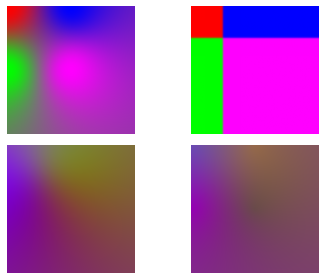

In [11]:
columns = 2
rows = 2
fig = plt.figure()
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(a[i-1])
    plt.axis("off")
fig.tight_layout()
# plt.show()
plt.savefig(os.path.join('out-images', "Interpolation"), dpi=300)